In [31]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import seaborn as sns
sns.set_context("paper")
sns.set_style('whitegrid', rc={
    'xtick.bottom': True,
    'ytick.left': True,
}) 

In [2]:
df = pd.read_parquet('/share/pi/nigam/mwornow/ehrshot-benchmark/ehrshot/eda/df__starr__n_gram_counts.parquet')

In [3]:
df1 = df[df['n'] == 1]
df2 = df[df['n'] == 2]
df3 = df[df['n'] == 3]
df4 = df[df['n'] == 4]
df_rr_1 = df1.groupby(['pid',]).agg({ 'count' : lambda x: (x > 1).sum() / len(x) }).reset_index().rename(columns={ 'count' : f'rr_1' })
df_rr_2 = df2.groupby(['pid',]).agg({ 'count' : lambda x: (x > 1).sum() / len(x) }).reset_index().rename(columns={ 'count' : f'rr_2' })
df_rr_3 = df3.groupby(['pid',]).agg({ 'count' : lambda x: (x > 1).sum() / len(x) }).reset_index().rename(columns={ 'count' : f'rr_3' })
df_rr_4 = df4.groupby(['pid',]).agg({ 'count' : lambda x: (x > 1).sum() / len(x) }).reset_index().rename(columns={ 'count' : f'rr_4' })

What percentage of n-grams are repeated?

In [6]:
tab10_colors = sns.color_palette("tab10")

In [30]:
def plot_percentage_n_grams_repeated(ax, values, n: int, color):
    ax.hist(values, bins=20, edgecolor='black', color=color)
    ax.set_title(f"# of patients with a given {n}-gram repetition rate")
    ax.set_ylabel("# of patients")
    ax.set_xlabel(f"Repetition Rate of {n}-grams (i.e. % of {n}-grams that are repeated)")

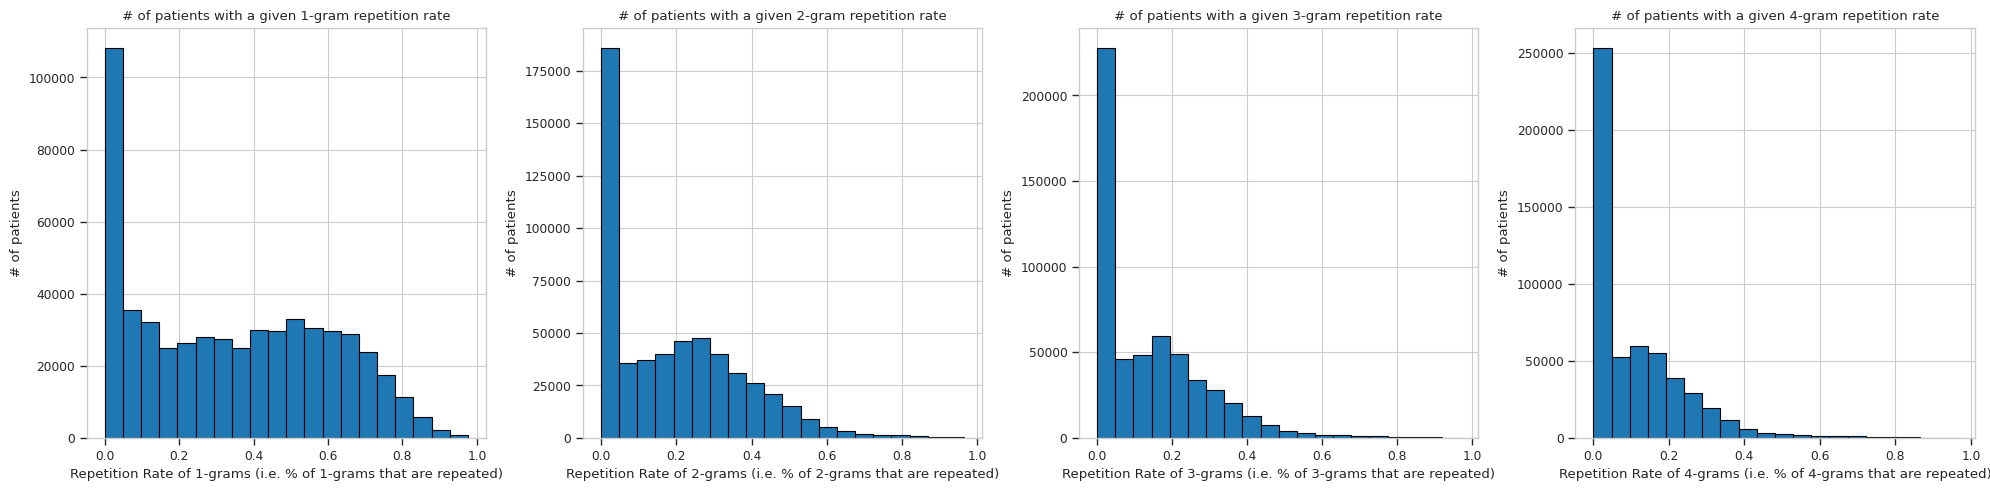

In [7]:
# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes = axes.flatten()  # Flatten the array for easy indexing

# Plot each histogram on its respective subplot
plot_percentage_n_grams_repeated(axes[0], df_rr_1['rr_1'], 1, tab10_colors[0])
plot_percentage_n_grams_repeated(axes[1], df_rr_2['rr_2'], 2, tab10_colors[0])
plot_percentage_n_grams_repeated(axes[2], df_rr_3['rr_3'], 3, tab10_colors[0])
plot_percentage_n_grams_repeated(axes[3], df_rr_4['rr_4'], 4, tab10_colors[0])

plt.tight_layout()  # Adjust layout
plt.show()

In [8]:
pid_counts = df[df['n'] == 1].groupby('pid')['count'].sum().reset_index()
pid_filtered = pid_counts[pid_counts['count'] >= 20]['pid']
df_repeated = df[df['pid'].isin(pid_filtered)]

In [9]:
df1_filtered = df_repeated[df_repeated['n'] == 1]
df2_filtered = df_repeated[df_repeated['n'] == 2]
df3_filtered = df_repeated[df_repeated['n'] == 3]
df4_filtered = df_repeated[df_repeated['n'] == 4]
df_rr_1_filtered = df1_filtered.groupby(['pid',]).agg({ 'count' : lambda x: (x > 1).sum() / len(x) }).reset_index().rename(columns={ 'count' : f'rr_1' })
df_rr_2_filtered = df2_filtered.groupby(['pid',]).agg({ 'count' : lambda x: (x > 1).sum() / len(x) }).reset_index().rename(columns={ 'count' : f'rr_2' })
df_rr_3_filtered = df3_filtered.groupby(['pid',]).agg({ 'count' : lambda x: (x > 1).sum() / len(x) }).reset_index().rename(columns={ 'count' : f'rr_3' })
df_rr_4_filtered = df4_filtered.groupby(['pid',]).agg({ 'count' : lambda x: (x > 1).sum() / len(x) }).reset_index().rename(columns={ 'count' : f'rr_4' })
# df

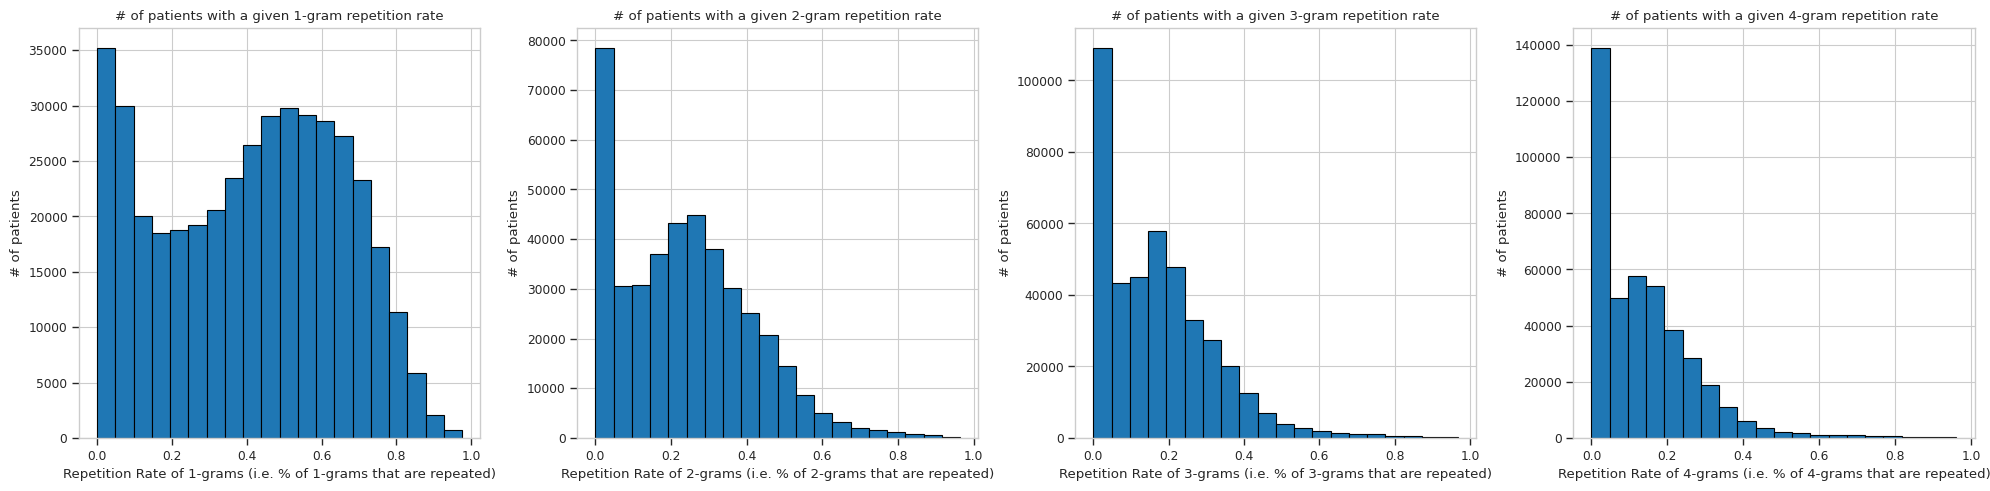

In [10]:
# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes = axes.flatten()  # Flatten the array for easy indexing

# Plot each histogram on its respective subplot
plot_percentage_n_grams_repeated(axes[0], df_rr_1_filtered['rr_1'], 1, tab10_colors[0])
plot_percentage_n_grams_repeated(axes[1], df_rr_2_filtered['rr_2'], 2, tab10_colors[0])
plot_percentage_n_grams_repeated(axes[2], df_rr_3_filtered['rr_3'], 3, tab10_colors[0])
plot_percentage_n_grams_repeated(axes[3], df_rr_4_filtered['rr_4'], 4, tab10_colors[0])

plt.tight_layout()  # Adjust layout
plt.show()

/tmp/ipykernel_1550445/3093996663.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


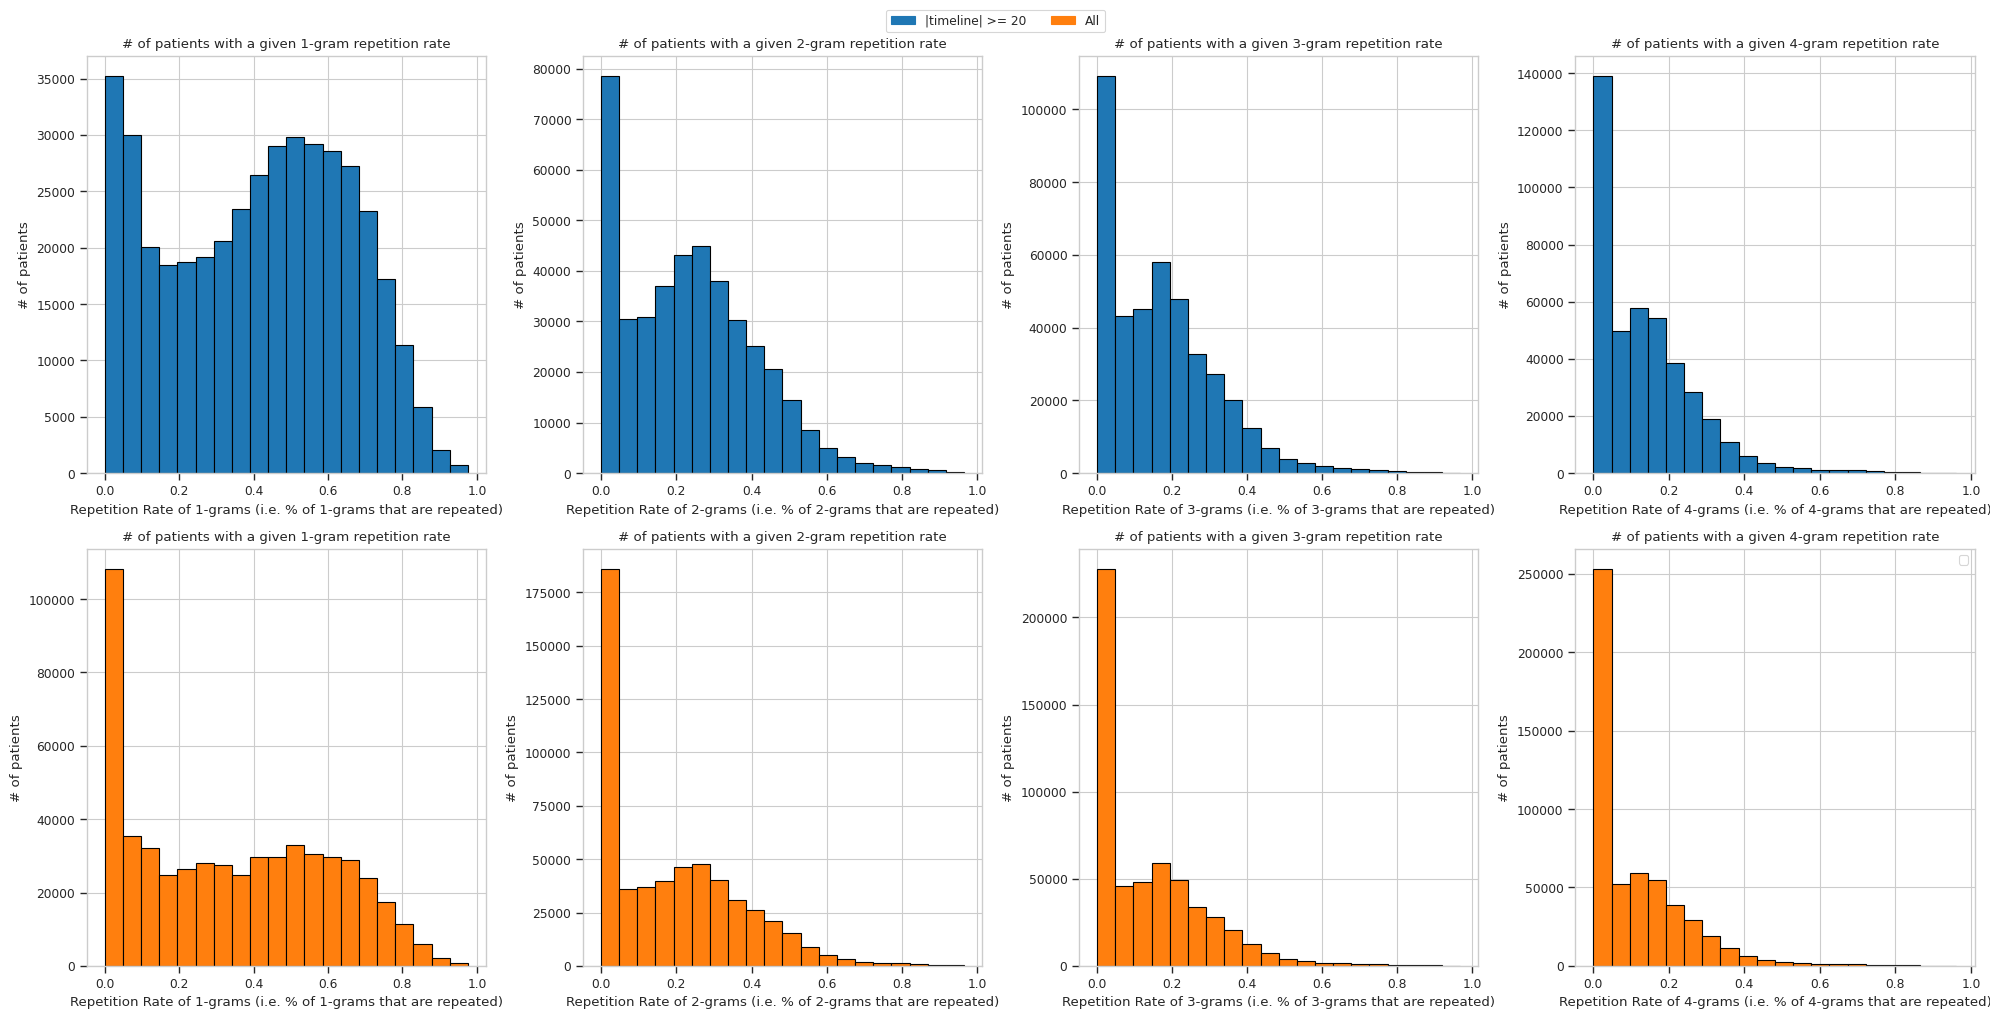

In [23]:
# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()  # Flatten the array for easy indexing
# Plot each histogram on its respective subplot

plot_percentage_n_grams_repeated(axes[0], df_rr_1_filtered['rr_1'], 1, tab10_colors[0])
plot_percentage_n_grams_repeated(axes[1], df_rr_2_filtered['rr_2'], 2, tab10_colors[0])
plot_percentage_n_grams_repeated(axes[2], df_rr_3_filtered['rr_3'], 3, tab10_colors[0])
plot_percentage_n_grams_repeated(axes[3], df_rr_4_filtered['rr_4'], 4, tab10_colors[0])

plot_percentage_n_grams_repeated(axes[4], df_rr_1['rr_1'], 1, tab10_colors[1])
plot_percentage_n_grams_repeated(axes[5], df_rr_2['rr_2'], 2, tab10_colors[1])
plot_percentage_n_grams_repeated(axes[6], df_rr_3['rr_3'], 3, tab10_colors[1])
plot_percentage_n_grams_repeated(axes[7], df_rr_4['rr_4'], 4, tab10_colors[1])

blue = tab10_colors[0]
orange = tab10_colors[1]
blue_patch = mpatches.Patch(color=blue, label='|timeline| >= 20')
orange_patch = mpatches.Patch(color=orange, label='All')

# Show the legend
fig.legend(handles=[blue_patch, orange_patch], loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=2)


plt.tight_layout()  # Adjust layout
plt.legend()
plt.show()